In [1]:
import matplotlib
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os


import seaborn as sns
from matplotlib import rcParams

#绘图前的基本设置

myfont = fm.FontProperties(fname=r'C:\Windows\Fonts\Times New Roman.tiff') # 设置字体

# 设置matplotlib正常显示中文和负号

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
# matplotlib.rcParams['font.sans-serif']=['NSimSun']   # 用黑体显示中文
# matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['font.size'] = 18
# matplotlib.rcParams['font.family'] = 'sans-serif'  
matplotlib.rcParams['font.sans-serif'] = 'Times New Roman'  # NSimSun 新宋体字体   宋体：SimSuncss

%matplotlib inline  
#内嵌绘图，并且可以省略掉plt.show()这一步
os.chdir(r'E:\BaiduSyncdisk\热浪博士论文\计算表格\Chapter3')


In [4]:
import pandas as pd

# Load the three CSV files
tx_df = pd.read_csv('Annual_Mean_Heatwave_Variables_TX.csv')  # Replace with the path to your TX table
tm_df = pd.read_csv('Annual_Mean_Heatwave_Variables_TM.csv')  # Replace with the path to your TM table
tn_df = pd.read_csv('Annual_Mean_Heatwave_Variables_TN.csv')  # Replace with the path to your TN table

# Add a column to distinguish each table
tx_df['type'] = 'TX'
tm_df['type'] = 'TM'
tn_df['type'] = 'TN'

# Concatenate the tables into one DataFrame
merged_df = pd.concat([tx_df, tm_df, tn_df], ignore_index=True)

# Display the merged DataFrame to verify the result
print(merged_df.head())

# Optionally, save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_heatwave_data.csv', index=False)


   system:index      mean variable  year  \
0             0  2.253936      HWA  1971   
1             1  2.583842      HWA  1972   
2             2  2.409914      HWA  1973   
3             3  2.029206      HWA  1974   
4             4  2.175614      HWA  1975   

                                     .geo type  
0  {"type":"MultiPoint","coordinates":[]}   TX  
1  {"type":"MultiPoint","coordinates":[]}   TX  
2  {"type":"MultiPoint","coordinates":[]}   TX  
3  {"type":"MultiPoint","coordinates":[]}   TX  
4  {"type":"MultiPoint","coordinates":[]}   TX  


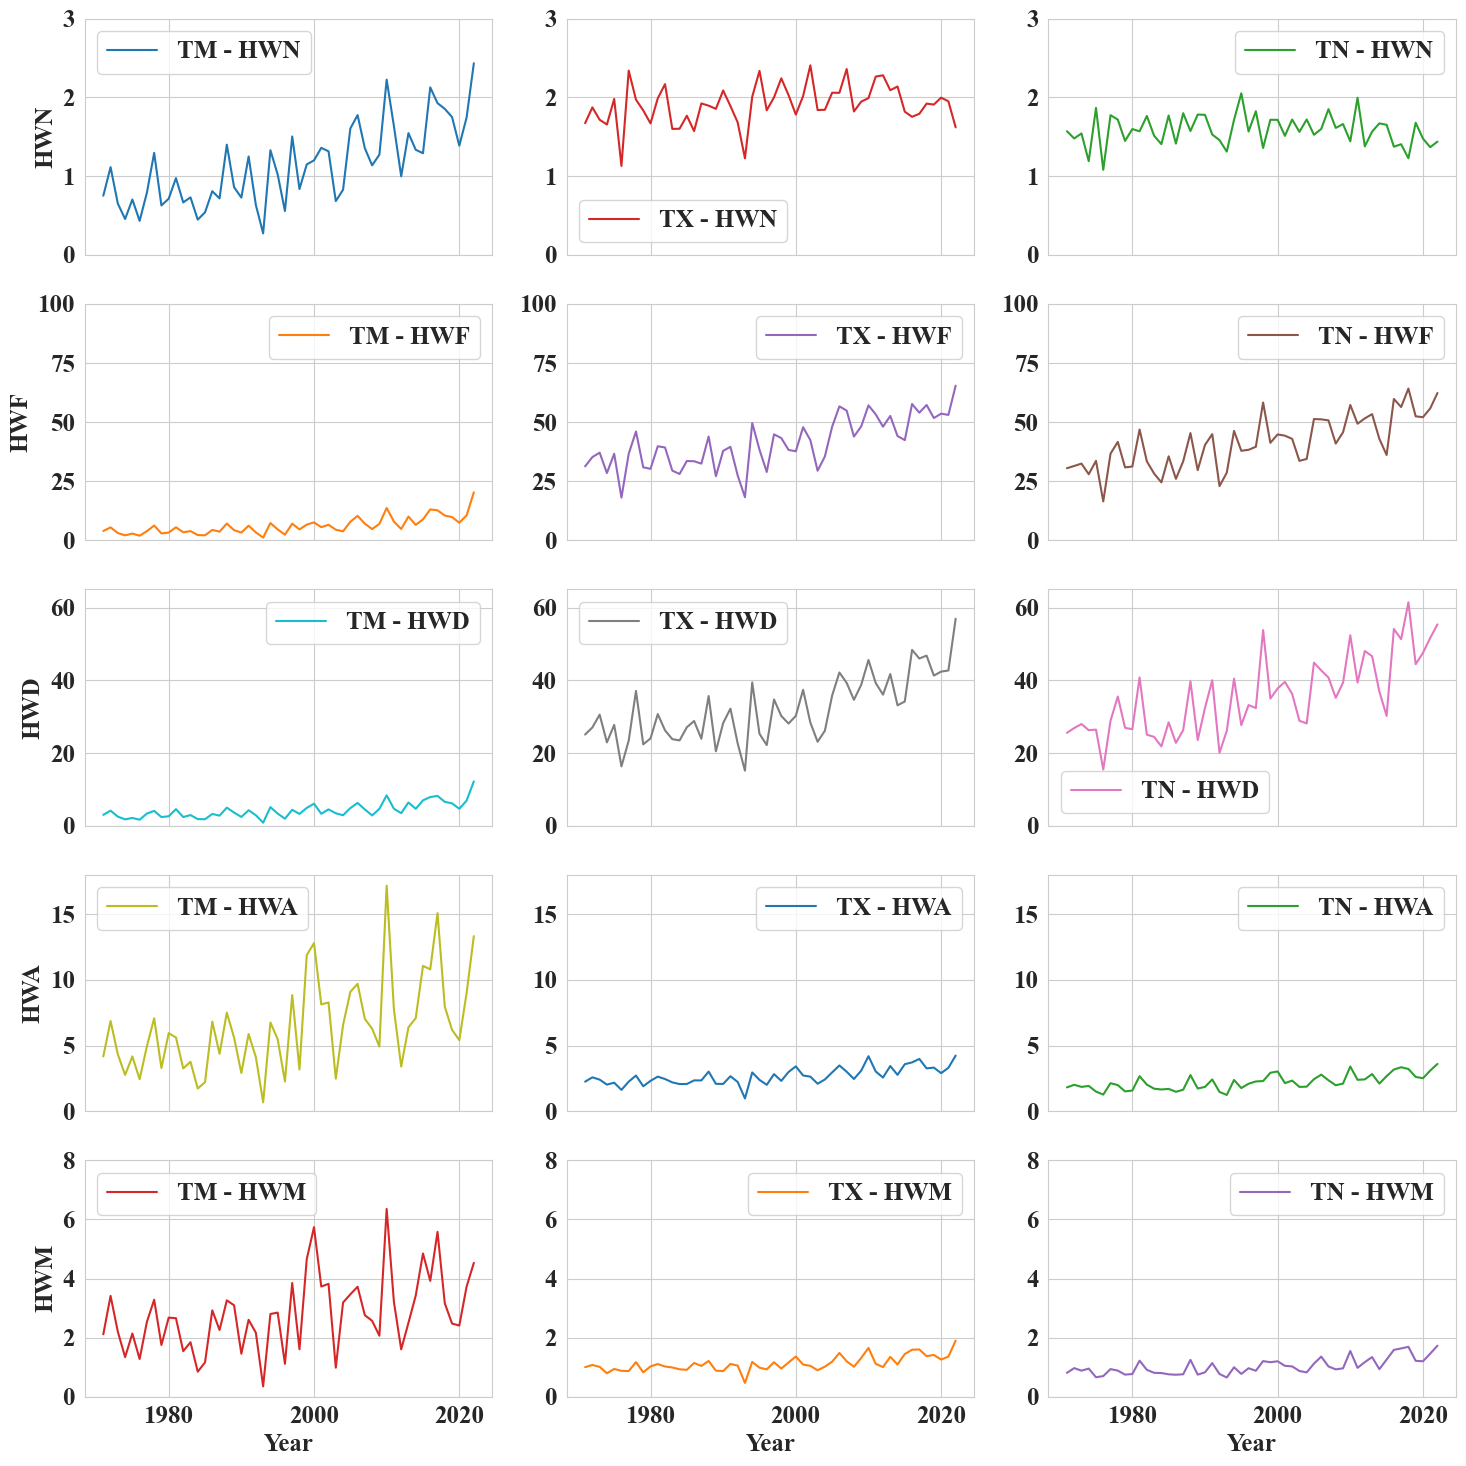

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged CSV file
csv_file_path = 'merged_heatwave_data.csv'  # Update with the path to your merged CSV file
df = pd.read_csv(csv_file_path)

# List of variables and temperature types
variables = ['HWN', 'HWF', 'HWD', 'HWA', 'HWM']
temperature_types = ['TM', 'TX', 'TN']

# Define the y-axis limits for each variable based on known value ranges
variable_ranges = {
    'HWA': (0, 18),  # Example range for HWA (adjust based on actual data range)
    'HWD': (0, 65),   # Example range for HWD
    'HWF': (0, 100),  # Example range for HWF
    'HWM': (0, 8),    # Example range for HWM
    'HWN': (0, 3)     # Example range for HWN
}

# Define a color map for each variable-temperature type combination
color_map = {
    ('HWN', 'TM'): 'tab:blue', 
    ('HWN', 'TX'): 'tab:red', 
    ('HWN', 'TN'): 'tab:green',
    ('HWF', 'TM'): 'tab:orange', 
    ('HWF', 'TX'): 'tab:purple', 
    ('HWF', 'TN'): 'tab:brown',
    ('HWD', 'TM'): 'tab:cyan', 
    ('HWD', 'TX'): 'tab:gray', 
    ('HWD', 'TN'): 'tab:pink',
    ('HWA', 'TM'): 'tab:olive', 
    ('HWA', 'TX'): 'tab:blue', 
    ('HWA', 'TN'): 'tab:green',
    ('HWM', 'TM'): 'tab:red', 
    ('HWM', 'TX'): 'tab:orange', 
    ('HWM', 'TN'): 'tab:purple'
}

# Create subplots: 5 rows (one for each variable), 3 columns (for each temperature type)
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15), sharex=True, sharey=False)

# Plot for each variable and temperature type
for i, variable in enumerate(variables):
    for j, temp_type in enumerate(temperature_types):
        # Filter the data for the current variable and temperature type
        variable_data = df[(df['variable'] == variable) & (df['type'] == temp_type)]
        
        # Get the color for this variable and temperature type combination
        color = color_map[(variable, temp_type)]
        
        # Plot the time series of the mean value for the current variable and temperature type
        axes[i, j].plot(variable_data['year'], variable_data['mean'], label=f'{temp_type} - {variable}', color=color)
        axes[i, j].grid(True)
        axes[i, j].legend()

        # Set the y-axis limit based on the known range for the current variable
        axes[i, j].set_ylim(variable_ranges[variable])
        
        # Set the y-axis label for each row based on the variable
        if j == 0:  # Only set ylabel for the first column (for better readability)
            axes[i, j].set_ylabel(variable)

# Set x-axis label for the entire plot
for ax in axes[-1, :]:
    ax.set_xlabel('Year')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


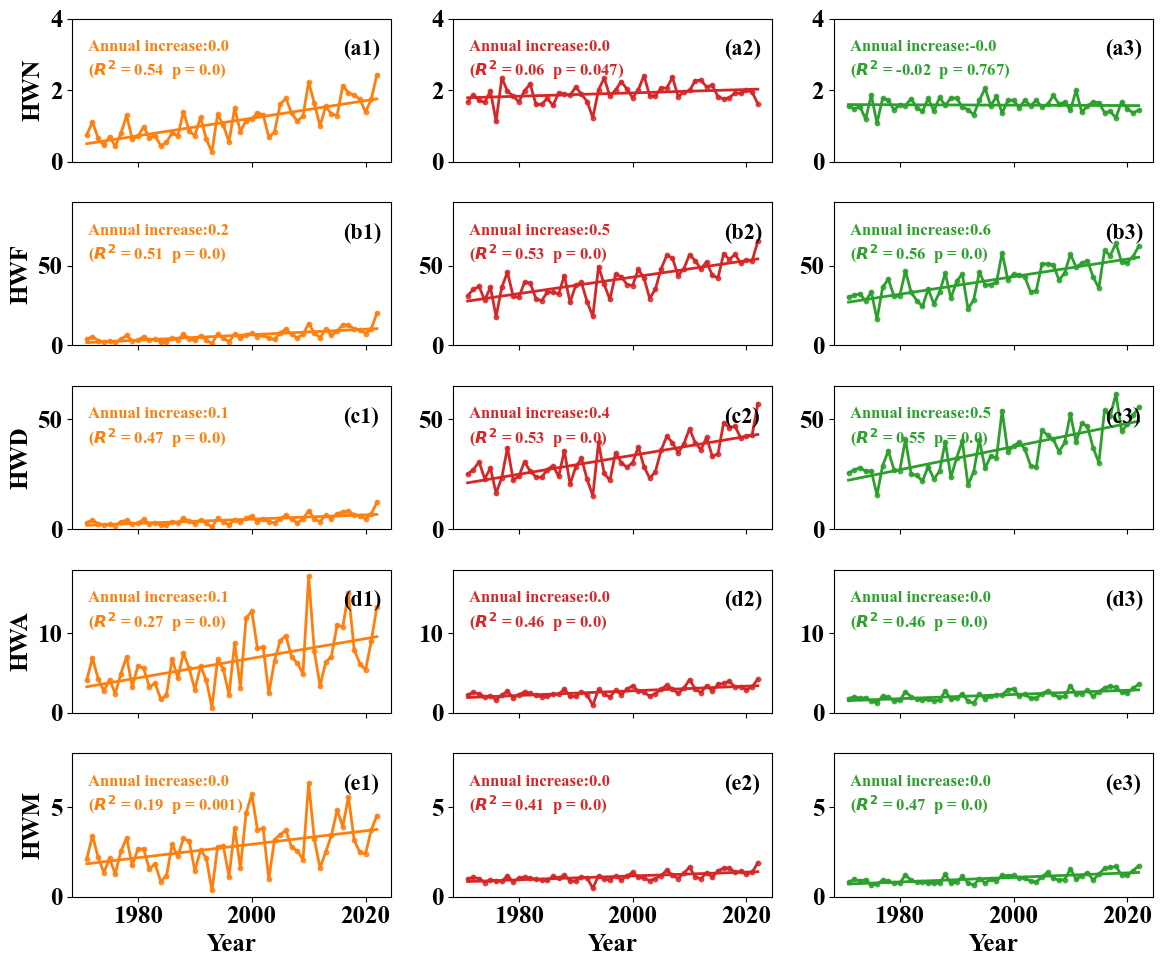

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the merged CSV file
csv_file_path = 'merged_heatwave_data.csv'  # Update with the path to your merged CSV file
df = pd.read_csv(csv_file_path)

# List of variables and temperature types
variables = ['HWN', 'HWF', 'HWD', 'HWA', 'HWM']
temperature_types = ['TM', 'TX', 'TN']

# Define the y-axis limits for each variable based on known value ranges
variable_ranges = {
    'HWA': (0, 18),  # Example range for HWA (adjust based on actual data range)
    'HWD': (0, 65),   # Example range for HWD
    'HWF': (0, 90),  # Example range for HWF
    'HWM': (0, 8),    # Example range for HWM
    'HWN': (0, 4)     # Example range for HWN
}

# Define a color map for each variable-temperature type combination
color_map = {
    ('HWN', 'TM'): 'tab:orange', 
    ('HWN', 'TX'): 'tab:red', 
    ('HWN', 'TN'): 'tab:green',
    ('HWF', 'TM'): 'tab:orange', 
    ('HWF', 'TX'): 'tab:red', 
    ('HWF', 'TN'): 'tab:green',
    ('HWD', 'TM'): 'tab:orange', 
    ('HWD', 'TX'): 'tab:red', 
    ('HWD', 'TN'): 'tab:green',
    ('HWA', 'TM'): 'tab:orange', 
    ('HWA', 'TX'): 'tab:red', 
    ('HWA', 'TN'): 'tab:green',
    ('HWM', 'TM'): 'tab:orange', 
    ('HWM', 'TX'): 'tab:red', 
    ('HWM', 'TN'): 'tab:green'
}

# Function to compute linear model
def lm_func(df, col):
    """Simple linear model of a time series data, returns coef, R2, and p-value"""
    
    # Get Data
    X_year = np.array(df["year"]).reshape((-1, 1))
    Y_stats = np.array(df[col]).reshape((-1, 1))

    # Add Intercept
    X_year_2 = sm.add_constant(X_year)

    # Regress
    model = sm.OLS(Y_stats, X_year_2).fit() 
        
    coef = model.params[1]
    
    # R2 and p-value
    r2 = model.rsquared_adj
    p = model.pvalues[1]
    
    return round(coef,4) , round(r2, 2), round(p, 3)

# Create subplots: 5 rows (one for each variable), 3 columns (for each temperature type)
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 10), sharex=True, sharey=False)

# Plot for each variable and temperature type
for i, variable in enumerate(variables):
    for j, temp_type in enumerate(temperature_types):
        # Filter the data for the current variable and temperature type
        variable_data = df[(df['variable'] == variable) & (df['type'] == temp_type)]
        
        # Get the color for this variable and temperature type combination
        color = color_map[(variable, temp_type)]
        
        # Plot the regression plot for the time series of the mean value for the current variable and temperature type
        sns.regplot(x='year', y='mean', data=variable_data, ax=axes[i, j], 
                    scatter_kws={'s': 10, 'color': color}, line_kws={'color': color, 'lw': 2}, ci=None)
        
        # Plot the line plot (mean value) as well
        sns.lineplot(x='year', y='mean', data=variable_data, ax=axes[i, j], color=color, lw=2)

        # Set the y-axis limit based on the known range for the current variable
        axes[i, j].set_ylim(variable_ranges[variable])
        
        # Calculate regression results
        coef, r2, p = lm_func(variable_data, 'mean')
        
        # Set the y-axis label for the leftmost column (i == 0)
        if j == 0:  
            axes[i, j].set_ylabel(variable)
        else:
            axes[i, j].set_ylabel('')  # Hide y-axis label for non-leftmost columns
        
        # Set the x-axis label for the bottom row (i == 4)
        if i == 4:
            axes[i, j].set_xlabel('Year')
        else:
            axes[i, j].set_xlabel('')  # Hide x-axis label for non-bottom rows

        # Add annotation with regression results
        text = f'Annual increase:{round(coef, 1)}\n($R^2$ = {r2}  p = {p})'
        axes[i, j].text(0.05, 0.85, text, transform=axes[i, j].transAxes, fontsize=12, 
                        verticalalignment='top', horizontalalignment='left', color=color)

        # Add subplot label (a1), (a2), (a3), etc.
        subplot_label = f'({chr(97 + i)}{j+1})'  # Using 'chr(97 + i)' to generate labels a1, a2, a3, ...
        axes[i, j].text(0.85, 0.85, subplot_label, transform=axes[i, j].transAxes, fontsize=16, 
                        fontweight='bold', verticalalignment='top', horizontalalignment='left')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig(r'E:\BaiduSyncdisk\热浪博士论文\论文图片\PD-03-07-热浪时间变化-ALL-EHF,MAX,MIN.png', dpi=400)
# Show the plot
plt.show()


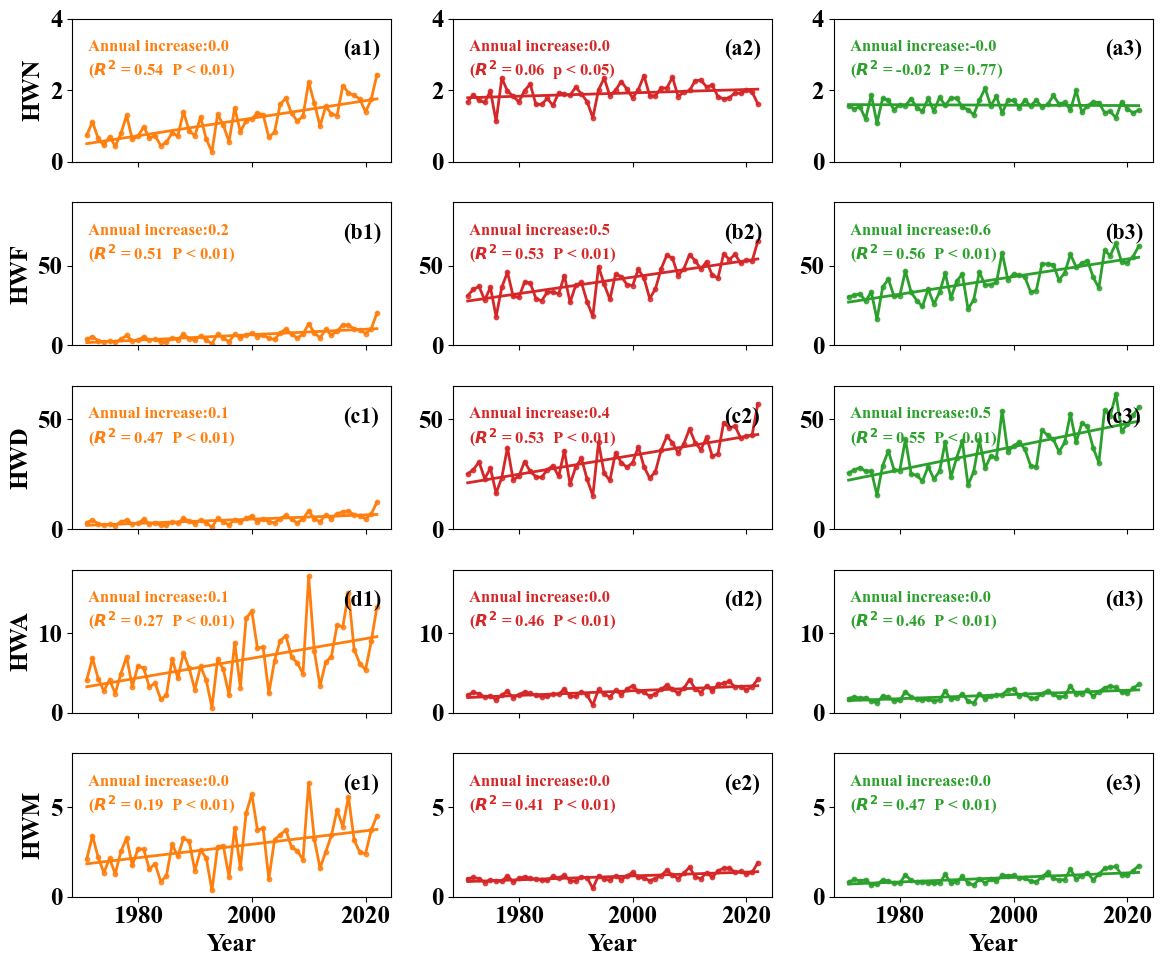

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# ======================
# 读取数据
# ======================
csv_file_path = 'merged_heatwave_data.csv'  # ← 修改为你的CSV路径（已上传同名文件可直接用）
df = pd.read_csv(csv_file_path)

# ======================
# 配置项
# ======================
variables = ['HWN', 'HWF', 'HWD', 'HWA', 'HWM']
temperature_types = ['TM', 'TX', 'TN']

# 各变量 Y 轴范围
variable_ranges = {
    'HWA': (0, 18),
    'HWD': (0, 65),
    'HWF': (0, 90),
    'HWM': (0, 8),
    'HWN': (0, 4)
}

# 颜色映射
color_map = {
    ('HWN', 'TM'): 'tab:orange', 
    ('HWN', 'TX'): 'tab:red', 
    ('HWN', 'TN'): 'tab:green',
    ('HWF', 'TM'): 'tab:orange', 
    ('HWF', 'TX'): 'tab:red', 
    ('HWF', 'TN'): 'tab:green',
    ('HWD', 'TM'): 'tab:orange', 
    ('HWD', 'TX'): 'tab:red', 
    ('HWD', 'TN'): 'tab:green',
    ('HWA', 'TM'): 'tab:orange', 
    ('HWA', 'TX'): 'tab:red', 
    ('HWA', 'TN'): 'tab:green',
    ('HWM', 'TM'): 'tab:orange', 
    ('HWM', 'TX'): 'tab:red', 
    ('HWM', 'TN'): 'tab:green'
}

# ======================
# 回归与格式化函数
# ======================
def lm_func(df_sub: pd.DataFrame, col: str):
    """
    对时间序列做简单线性回归：mean ~ year
    返回：斜率coef、调整R2、原始p值（不四舍五入，避免0.0096被四舍五入到0.010）
    """
    use = df_sub[['year', col]].dropna().copy()
    if use.empty or use['year'].nunique() < 2:
        return np.nan, np.nan, np.nan

    use['year'] = pd.to_numeric(use['year'], errors='coerce')
    use = use.dropna(subset=['year', col])
    if use.empty or use['year'].nunique() < 2:
        return np.nan, np.nan, np.nan

    X_year = np.array(use['year']).reshape((-1, 1))
    Y_stats = np.array(use[col]).reshape((-1, 1))

    X_year_2 = sm.add_constant(X_year)
    model = sm.OLS(Y_stats, X_year_2).fit()

    coef = float(model.params[1])
    r2 = float(model.rsquared_adj)
    p = float(model.pvalues[1])

    return round(coef, 4), round(r2, 2), p

def format_p(p: float) -> str:
    """按阈值格式化 p 值，避免显示 P=0.000"""
    if np.isnan(p):
        return "P = NA"
    if p < 0.01:
        return "P < 0.01"
    elif p < 0.05:
        return "p < 0.05"
    else:
        return f"P = {p:.2f}"

# ======================
# 作图（不设置 seaborn 样式，保持原始）
# ======================
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12, 10), sharex=True, sharey=False)

for i, variable in enumerate(variables):
    for j, temp_type in enumerate(temperature_types):
        ax = axes[i, j]

        # 当前变量与温度类型
        variable_data = df[(df['variable'] == variable) & (df['type'] == temp_type)].copy()
        if 'year' in variable_data.columns:
            variable_data = variable_data.sort_values('year')

        color = color_map[(variable, temp_type)]

        # 回归散点+拟合线
        sns.regplot(
            x='year', y='mean', data=variable_data, ax=ax,
            scatter_kws={'s': 10, 'color': color},
            line_kws={'color': color, 'lw': 2}, ci=None
        )

        # 折线（年均值）
        sns.lineplot(x='year', y='mean', data=variable_data, ax=ax, color=color, lw=2)

        # Y 轴范围
        ax.set_ylim(variable_ranges[variable])

        # 回归结果
        coef, r2, p = lm_func(variable_data, 'mean')
        p_str = format_p(p)

        # 轴标签
        if j == 0:
            ax.set_ylabel(variable)
        else:
            ax.set_ylabel('')

        if i == 4:
            ax.set_xlabel('Year')
        else:
            ax.set_xlabel('')

        # 注释文本
        if np.isnan(coef) or np.isnan(r2) or (p_str == "P=NA"):
            text = 'Annual increase: NA\n($R^2$ = NA  P = NA)'
        else:
            text = f'Annual increase:{round(coef, 1)}\n($R^2$ = {r2}  {p_str})'

        ax.text(
            0.05, 0.85, text, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', horizontalalignment='left', color=color
        )

        # 子图编号 (a1), (a2), ...
        subplot_label = f'({chr(97 + i)}{j+1})'
        ax.text(
            0.85, 0.85, subplot_label, transform=ax.transAxes, fontsize=16,
            fontweight='bold', verticalalignment='top', horizontalalignment='left'
        )

plt.tight_layout()
plt.savefig(r'E:\BaiduSyncdisk\热浪博士论文\论文图片\PD-03-07-热浪时间变化-ALL-EHF,MAX,MIN-0821.png', dpi=400)
plt.show()
